<div style="text-align: center;">
    <h1>BCSE417P LAB Assignments 1 - 3</h1>
</div>
<div style="text-align: center;">
    <h2>Siddarth Chandrasekar 21BAI1195</h2>
</div>
<div style="text-align: center;">
    <h3>August 16, 2024</h3>
</div>
<div style="text-align: center;">
    <h3>By turning in this assignment, I agree and declare that all
of this is my own work.
</h3>
</div>


https://github.com/SidInaSoup/MachineVision.git

# AS - 1 (a)

### Task 1: Basic Image Statistics and Color Space Conversion

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

#### 1) Read the Image

In [10]:
image = cv2.imread("img_mv.jpg")
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

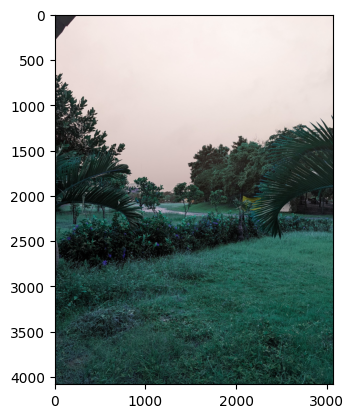

In [11]:
plt.imshow(image)

#### 2) Compute Basic Statistics

Blue Channel:
  Mean: 105.23439390893076
  Standard Deviation: 100.41571191750951


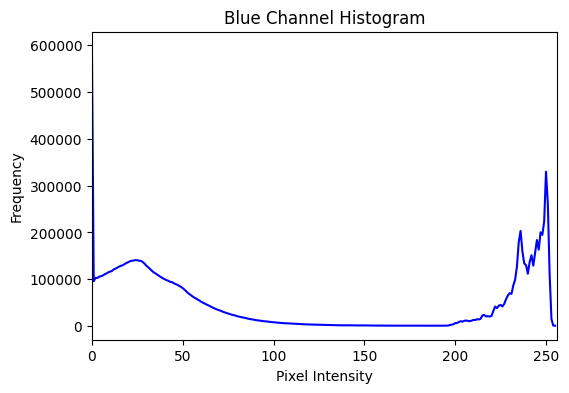

Green Channel:
  Mean: 120.18624331405739
  Standard Deviation: 83.0706646422378


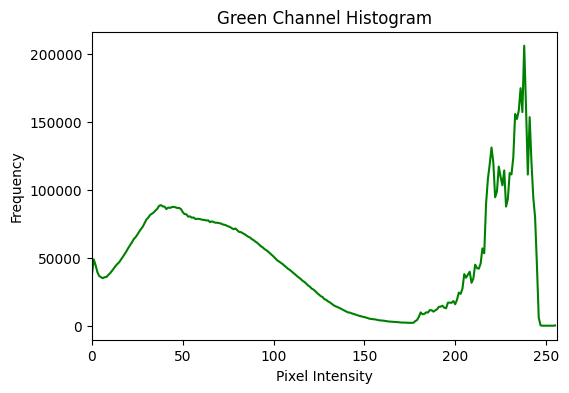

Red Channel:
  Mean: 115.30577879263684
  Standard Deviation: 83.66939163820595


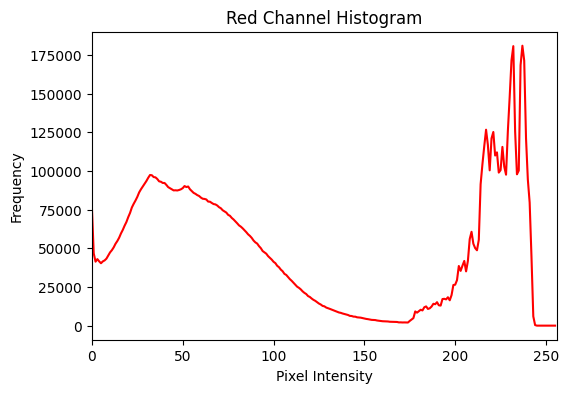

In [12]:
channels = cv2.split(image)
color_names = ['Blue', 'Green', 'Red']

for i, channel in enumerate(channels):
    mean = np.mean(channel)
    std_dev = np.std(channel)
    histogram, _ = np.histogram(channel, bins=256, range=[0, 256])

    print(f'{color_names[i]} Channel:')
    print(f'  Mean: {mean}')
    print(f'  Standard Deviation: {std_dev}')
    
    # Plot the histogram
    plt.figure(figsize=(6, 4))
    plt.title(f'{color_names[i]} Channel Histogram')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.plot(histogram, color=color_names[i].lower())
    plt.xlim([0, 256])
    plt.show()

#### 3) Convert to HSV and Lab color spaces


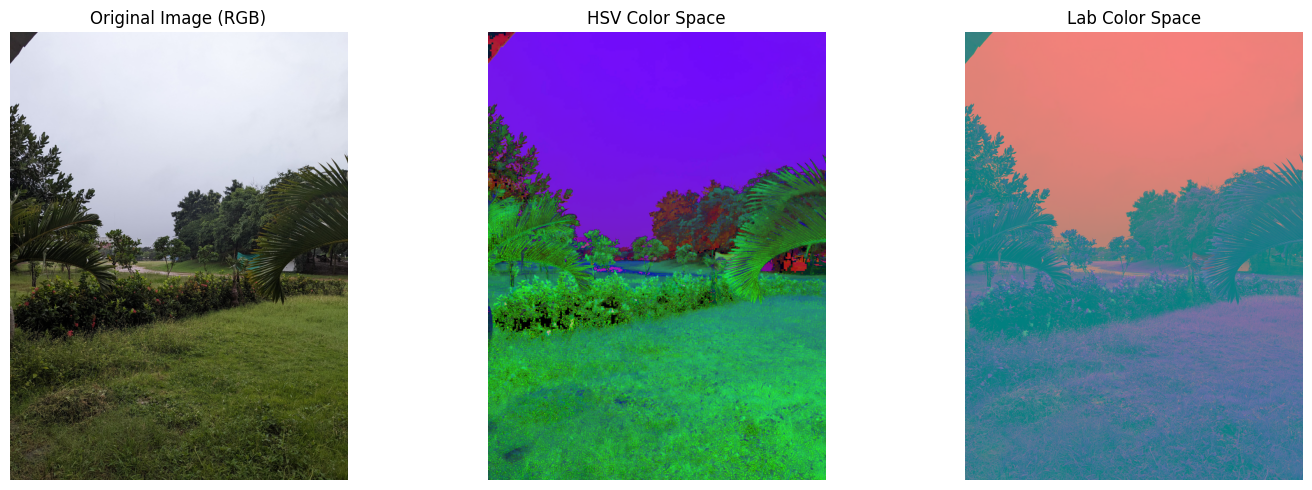

In [14]:
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
lab_image = cv2.cvtColor(image, cv2.COLOR_BGR2Lab)

# Display the original, HSV, and Lab images
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(image_rgb)
plt.title('Original Image (RGB)')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(hsv_image)
plt.title('HSV Color Space')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(lab_image)
plt.title('Lab Color Space')
plt.axis('off')

plt.tight_layout()
plt.show()


Observations:

- Basic Image Statistics:
Mean and Standard Deviation:
The mean and standard deviation of each color channel provide insights into the overall brightness and contrast of the image.
Higher mean values in a particular channel indicate a dominance of that color in the image, while lower values suggest that the color is less prominent.
The standard deviation indicates the spread of intensity values. A high standard deviation suggests high contrast within the channel, while a low standard deviation indicates a more uniform color distribution.

- Histograms:
The histograms of the Red, Green, and Blue channels display the distribution of pixel intensities across the color spectrum.
Peaks in the histogram indicate the most common intensity values, which help identify dominant colors in the image.
The shape of the histogram can reveal whether an image is predominantly light or dark, or whether it has high contrast or is more flat.
Color Space Conversion:

- HSV Color Space:
The HSV color space separates color information (Hue) from intensity information (Saturation and Value), which can make certain types of image processing tasks easier.
The Hue channel represents the color type, the Saturation channel represents the vibrancy of the color, and the Value channel represents the brightness.
The conversion to HSV shows how color distribution changes when focusing solely on color or intensity.
Lab Color Space:
The Lab color space aims to mimic human vision by separating luminance (L) from color information (a* and b* channels).
The L channel represents the lightness, while the a* and b* channels represent color information along green-red and blue-yellow axes, respectively.
The Lab space is particularly useful for color correction and balancing tasks because of its perceptual uniformity.


Conclusion:

- Statistical Analysis:
Computing the basic statistics and histograms of color channels provides valuable information about the image's overall color distribution, contrast, and dominant colors. These statistics are crucial for understanding the image’s composition and can guide further image processing tasks.

- Impact of Color Space Conversion:
Converting the image to HSV and Lab color spaces highlights different aspects of the image. The HSV space is useful for tasks where color is more important than intensity, while the Lab space is advantageous for tasks requiring precise color manipulation and correction.
The choice of color space can significantly impact the effectiveness of image processing techniques. Understanding how each color space represents image data allows for more informed decisions when applying filters, segmentation, or enhancement methods.

- Applications:
These conversions are widely used in computer vision tasks such as object detection, image segmentation, and color-based filtering. The ability to manipulate and analyze images in different color spaces enhances the flexibility and accuracy of image processing techniques.

### Task 2: Simple Image Segmentation Using Thresholding

In [16]:
# 1) Read the Image: Load a grayscale image.
image = cv2.imread("image.png", 0)  

In [17]:
# 2) Apply fixed thresholding
threshold_value = 128  # Set a fixed threshold value
height, width = image.shape

# Initialize an empty image for the segmented output
segmented_image = np.zeros((height, width), dtype=np.uint8)

# Apply the thresholding
for i in range(height):
    for j in range(width):
        if image[i, j] > threshold_value:
            segmented_image[i, j] = 255  # Set to white if the pixel value is above the threshold
        else:
            segmented_image[i, j] = 0  # Set to black if the pixel value is below or equal to the threshold



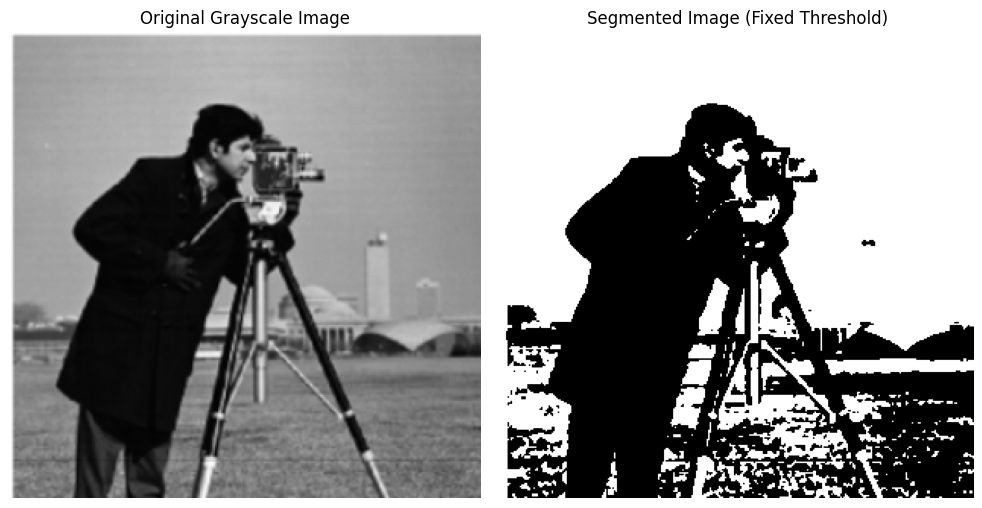

In [18]:
# 3) Display the original and segmented images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Grayscale Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(segmented_image, cmap='gray')
plt.title('Segmented Image (Fixed Threshold)')
plt.axis('off')

plt.tight_layout()
plt.show()


Observations:

- Thresholding:
The chosen threshold effectively separated bright regions (objects) from the darker background.
Some details may be lost if the threshold is not carefully selected, especially in images with varying intensities.

- Binary Segmentation:
The resulting binary image highlights the regions of interest, making it easier to isolate objects within the image.
Thresholding works well for images with clear intensity differences but may struggle with images that have overlapping intensity values.

Conclusion:
- Thresholding is a straightforward and effective method for basic image segmentation, particularly in images with distinct foreground and background intensities. However, its effectiveness depends heavily on the choice of threshold value, and it may not perform well in images with complex intensity distributions.

### Task 3: Color-Based Segmentation

In [19]:
# Step 1: Load the image
image = cv2.imread("colored_objects.png")

In [21]:
# Step 2: Convert to HSV
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

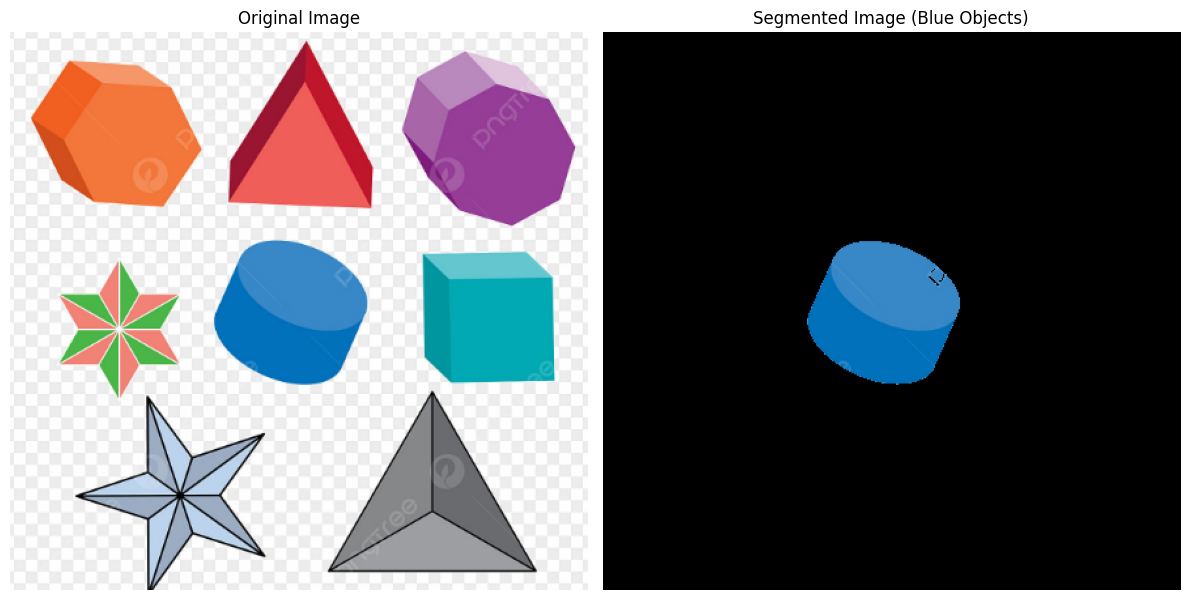

In [22]:

# Step 3: Apply color thresholding (e.g., to segment blue objects)

# Define the range of blue color in HSV
lower_blue = np.array([100, 150, 0])  
upper_blue = np.array([140, 255, 255]) 

mask = np.zeros(hsv_image.shape[:2], dtype=np.uint8)  

for i in range(hsv_image.shape[0]):
    for j in range(hsv_image.shape[1]):
        if lower_blue[0] <= hsv_image[i, j, 0] <= upper_blue[0] and \
           lower_blue[1] <= hsv_image[i, j, 1] <= upper_blue[1] and \
           lower_blue[2] <= hsv_image[i, j, 2] <= upper_blue[2]:
            mask[i, j] = 255  

segmented_image = cv2.bitwise_and(image, image, mask=mask)

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
segmented_image_rgb = cv2.cvtColor(segmented_image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title('Original Image')
plt.axis('off')



plt.subplot(1, 2, 2)
plt.imshow(segmented_image_rgb)
plt.title('Segmented Image (Blue Objects)')
plt.axis('off')

plt.tight_layout()
plt.show()

Observations:

- HSV Color Space:
The HSV color space facilitated more accurate segmentation by separating color information (Hue) from intensity (Value).
Objects of the target color were effectively isolated using appropriate hue and saturation thresholds.

- Color Thresholding:
The segmentation was highly effective for objects with distinct and uniform colors.
Some challenges may arise with objects having similar hues or varying illumination, requiring fine-tuning of the thresholds.


Conclusion:
- Color-based segmentation using the HSV color space is a powerful technique for isolating objects based on their color. It offers more precision than direct RGB thresholding, particularly in images where color is the key distinguishing feature. However, careful selection of threshold values is crucial to accurately segment the desired objects.

# AS - 1 (b)

### Task 1: Image Negative Transformation

In [23]:
# Step 1: Load the grayscale image
image = cv2.imread("image.png", 0)

In [24]:
# Step 2: Apply the image negative transformation
height, width = image.shape
negative_image = np.zeros((height, width), dtype=np.uint8)

# Perform the negative transformation
for i in range(height):
    for j in range(width):
        negative_image[i, j] = 255 - image[i, j]

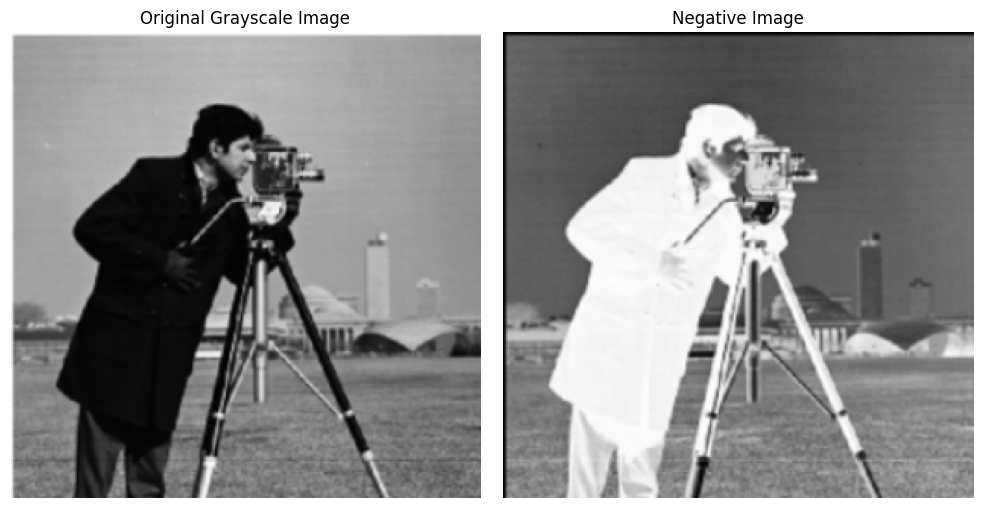

In [25]:
# Step 3: Display the original and negative images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Grayscale Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(negative_image, cmap='gray')
plt.title('Negative Image')
plt.axis('off')

plt.tight_layout()
plt.show()

### Task 2: Gamma Correction

In [26]:
# Step 1: Load the grayscale image
image = cv2.imread("image.png", 0)

In [27]:
def apply_gamma_correction(image, gamma):
    normalized_image = image / 255.0
    
    gamma_corrected = np.power(normalized_image, gamma)
    
    gamma_corrected = np.uint8(gamma_corrected * 255)
    
    return gamma_corrected

In [28]:
# Step 2: Apply gamma correction with different gamma values
gamma_values = [0.5, 1.0, 2.0]
gamma_corrected_images = []

for gamma in gamma_values:
    corrected_image = apply_gamma_correction(image, gamma)
    gamma_corrected_images.append(corrected_image)


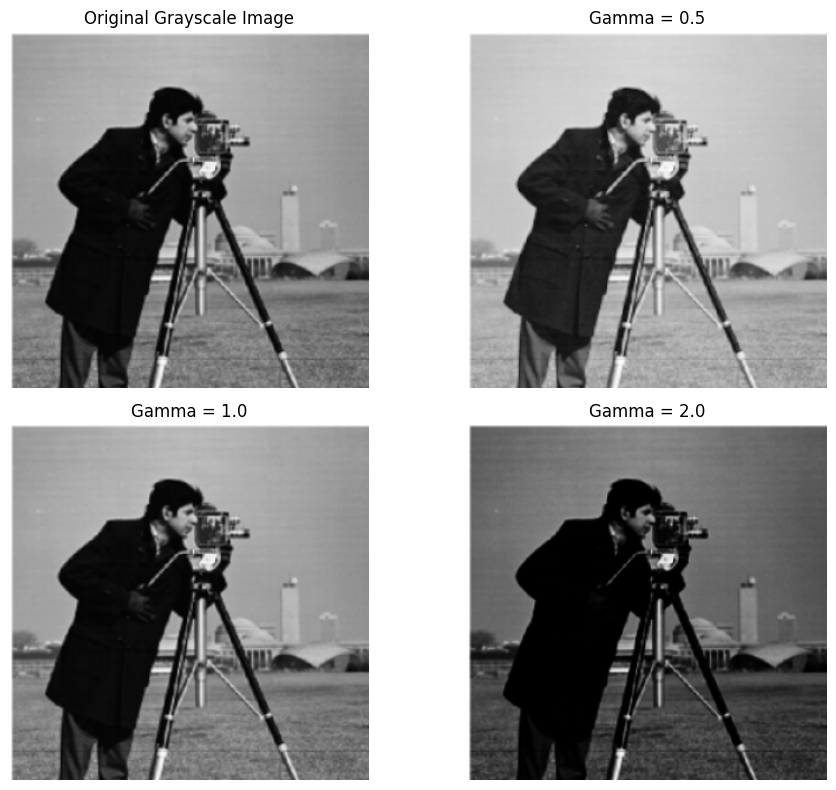

In [30]:
# Step 3: Display the original and gamma-corrected images
plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Grayscale Image')
plt.axis('off')

for i, gamma in enumerate(gamma_values):
    plt.subplot(2, 2, i + 2)
    plt.imshow(gamma_corrected_images[i], cmap='gray')
    plt.title(f'Gamma = {gamma}')
    plt.axis('off')

plt.tight_layout()
plt.show()


### Task 3: Log Transform


In [31]:
def apply_log_transformation(image, c=255.0):
    normalized_image = image / 255.0
    
    log_transformed = c * np.log1p(normalized_image)  
    
    log_transformed = np.uint8(log_transformed)
    
    return log_transformed

# Step 1: Load the grayscale image
image = cv2.imread("image.png", 0)  


In [32]:

# Step 2: Apply log transformation
log_transformed_image = apply_log_transformation(image)



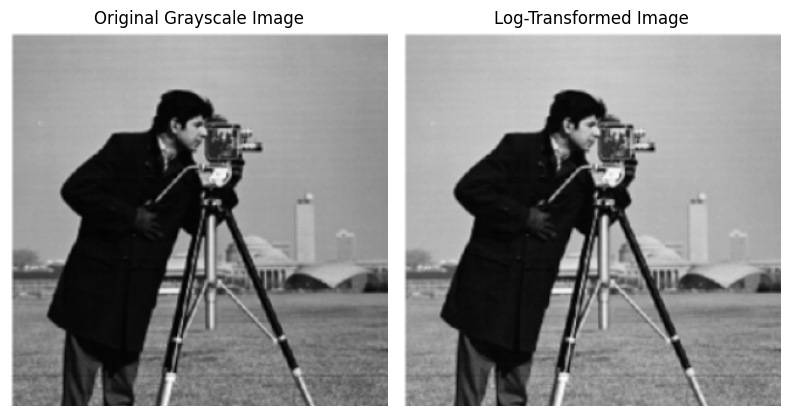

In [34]:

# Step 3: Display the original and log-transformed images
plt.figure(figsize=(8, 6))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Grayscale Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(log_transformed_image, cmap='gray')
plt.title('Log-Transformed Image')
plt.axis('off')

plt.tight_layout()
plt.show()

### Task 4: Compare Transformations

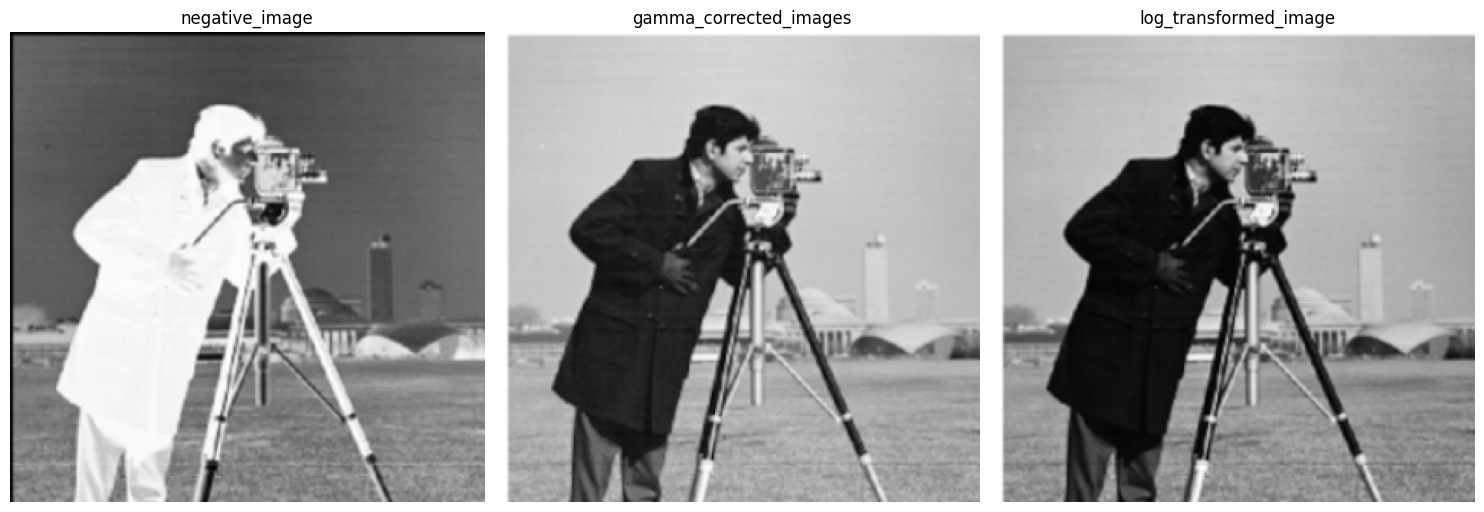

In [37]:
# Plot images side by side using subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(negative_image, cmap = 'gray')
axes[0].set_title('negative_image')
axes[0].axis('off')

axes[1].imshow(gamma_corrected_images[0], cmap = 'gray')
axes[1].set_title('gamma_corrected_images')
axes[1].axis('off')

axes[2].imshow(log_transformed_image, cmap = 'gray')
axes[2].set_title('log_transformed_image')
axes[2].axis('off')

plt.tight_layout()
plt.show()

Observations:

- Image Negative:
The negative transformation inverted the intensity values, making bright areas appear dark and vice versa.
This transformation is useful for analyzing features in bright regions by enhancing them in the negative image.

- Gamma Correction (γ=2.0):
The gamma correction with γ=2.0 darkened the image, reducing the brightness of higher intensity pixels.
This is effective for suppressing highlights and enhancing details in brighter regions.

- Log Transformation:
The log transformation enhanced the visibility of darker areas by compressing the intensity range.
It is particularly useful for images with a wide dynamic range, where details in shadows need to be revealed.

Conclusion:
- Each transformation uniquely alters the image, highlighting different aspects of the pixel intensity distribution. The image negative transformation is effective for inverting brightness, gamma correction controls overall brightness with emphasis on either dark or light regions, and log transformation is beneficial for enhancing details in dark areas. These transformations can be selected based on the specific analysis or enhancement required for the image.

### Task 5: Apply Transformations to Color Images

In [39]:
# Step 1: Load the color image
image = cv2.imread("colored_objects.png")
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


In [40]:
# Step 2: Split the image into R, G, and B channels
r_channel, g_channel, b_channel = cv2.split(image_rgb)


In [41]:
def apply_gamma_correction(channel, gamma):
    normalized_channel = channel / 255.0
    gamma_corrected = np.power(normalized_channel, gamma)
    return np.uint8(gamma_corrected * 255)

def apply_log_transformation(channel):
    normalized_channel = channel / 255.0
    log_transformed = 255 * np.log1p(normalized_channel)
    return np.uint8(log_transformed)

def apply_image_negative(channel):
    return 255 - channel

In [42]:
# Define gamma values for gamma correction
gamma_values = [0.5, 1.0, 2.0]

# Apply transformations to each channel
transformed_channels = {
    'negative': {
        'R': apply_image_negative(r_channel),
        'G': apply_image_negative(g_channel),
        'B': apply_image_negative(b_channel),
    },
    'gamma_0.5': {
        'R': apply_gamma_correction(r_channel, 0.5),
        'G': apply_gamma_correction(g_channel, 0.5),
        'B': apply_gamma_correction(b_channel, 0.5),
    },
    'gamma_1.0': {
        'R': apply_gamma_correction(r_channel, 1.0),
        'G': apply_gamma_correction(g_channel, 1.0),
        'B': apply_gamma_correction(b_channel, 1.0),
    },
    'gamma_2.0': {
        'R': apply_gamma_correction(r_channel, 2.0),
        'G': apply_gamma_correction(g_channel, 2.0),
        'B': apply_gamma_correction(b_channel, 2.0),
    },
    'log': {
        'R': apply_log_transformation(r_channel),
        'G': apply_log_transformation(g_channel),
        'B': apply_log_transformation(b_channel),
    }
}

In [43]:
def merge_channels(r, g, b):
    return cv2.merge([r, g, b])


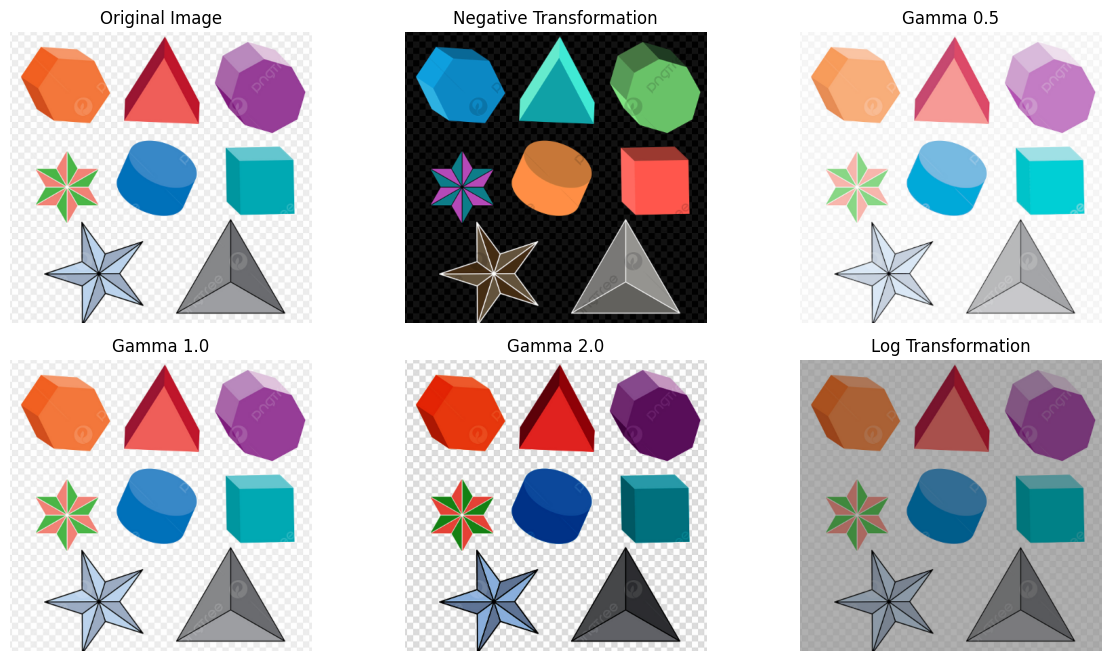

In [44]:
# Display the original and transformed images
plt.figure(figsize=(12, 10))

plt.subplot(3, 3, 1)
plt.imshow(image_rgb)
plt.title('Original Image')
plt.axis('off')

# Display the negative transformation
negative_image = merge_channels(transformed_channels['negative']['R'],
                                transformed_channels['negative']['G'],
                                transformed_channels['negative']['B'])
plt.subplot(3, 3, 2)
plt.imshow(negative_image)
plt.title('Negative Transformation')
plt.axis('off')

# Display gamma corrections
for i, gamma in enumerate([0.5, 1.0, 2.0], start=3):
    gamma_image = merge_channels(transformed_channels[f'gamma_{gamma}']['R'],
                                 transformed_channels[f'gamma_{gamma}']['G'],
                                 transformed_channels[f'gamma_{gamma}']['B'])
    plt.subplot(3, 3, i)
    plt.imshow(gamma_image)
    plt.title(f'Gamma {gamma}')
    plt.axis('off')

# Display log transformation
log_image = merge_channels(transformed_channels['log']['R'],
                           transformed_channels['log']['G'],
                           transformed_channels['log']['B'])
plt.subplot(3, 3, 6)
plt.imshow(log_image)
plt.title('Log Transformation')
plt.axis('off')

plt.tight_layout()
plt.show()


Observations:

Effect on Color Images:
- Image Negative: The color negative transformation resulted in a visually distinct image where colors were inverted. Unlike grayscale images, where only brightness is inverted, the color relationships were also reversed, leading to a complementary color scheme.
Gamma Correction: The gamma correction darkened the image, but the effect varied across the channels, potentially altering the color balance and creating a color shift. This is different from grayscale images, where the effect is uniform.

- Log Transformation: 
The log transformation brightened darker regions in each channel, enhancing subtle color details. The combined effect brought out details that were less noticeable in the original image, similar to its effect on grayscale images, but with the added complexity of color interaction.

Comparison with Grayscale Images:
- In grayscale images, these transformations affect only the intensity, resulting in more straightforward brightness and contrast adjustments.
- In color images, each transformation not only alters brightness but also impacts the color balance and hue, leading to more complex and visually striking results. The interaction between channels can create new color tones and affect the overall appearance in ways that are not seen in grayscale processing.

Conclusion:
- Applying transformations to color images involves processing each channel separately, which introduces additional complexity compared to grayscale images. The resulting effects are more nuanced, affecting not just the intensity but also the color balance and overall visual impression of the image. Understanding these differences is crucial for effective image enhancement in color images, as the transformations can produce more varied and sometimes unexpected results.

# AS - 1 (c) Image Enhancement- Histogram Equalization

### Task 1: Introduction to Histogram Equalization

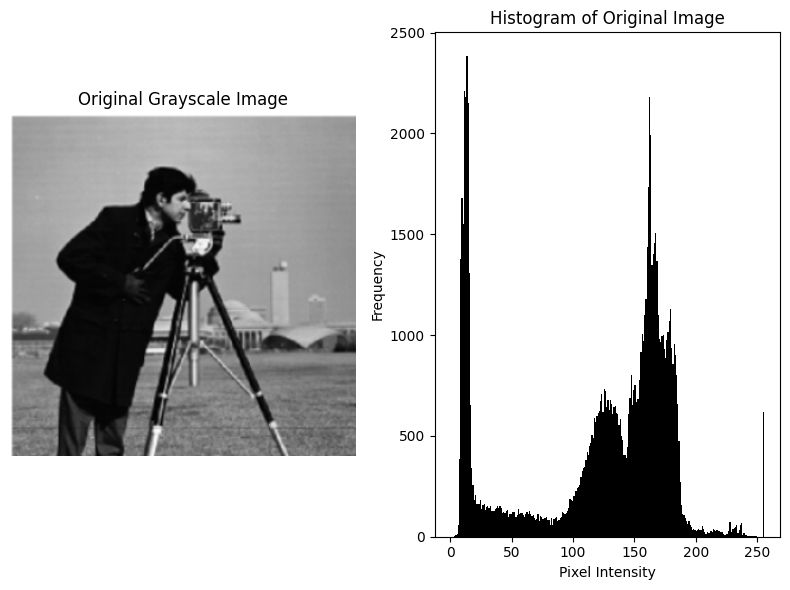

In [46]:
# Step 1: Load and Display an Image
image = cv2.imread("image.png", 0)  # Load the image in grayscale mode

# Display the original image
plt.figure(figsize=(8, 6))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Grayscale Image')
plt.axis('off')

# Plot the histogram of the original image
plt.subplot(1, 2, 2)
plt.hist(image.ravel(), bins=256, range=[0, 256], color='black')
plt.title('Histogram of Original Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


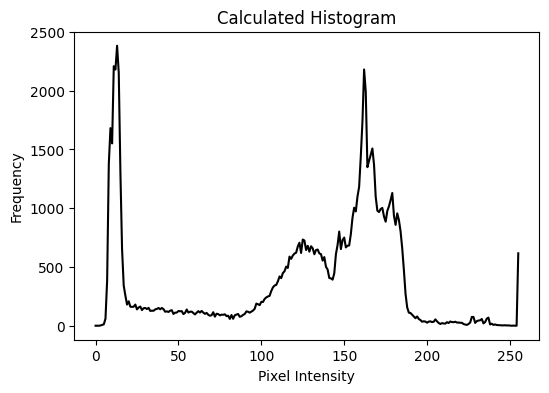

In [49]:
# Step 2: Calculate and Plot Histogram
histogram, bins = np.histogram(image.flatten(), bins=256, range=[0, 256])

# Plot the histogram
plt.figure(figsize=(6, 4))
plt.plot(histogram, color='black')
plt.title('Calculated Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()


In [50]:
# Step 3: Calculate Cumulative Distribution Function (CDF)
cdf = np.cumsum(histogram)
cdf_normalized = cdf * (255 / cdf[-1])  

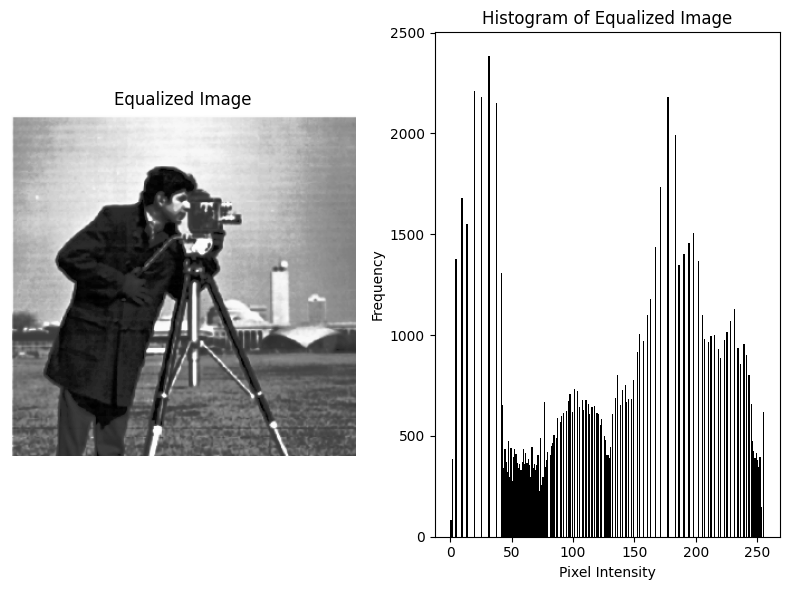

In [53]:

# Step 4: Apply Histogram Equalization
# Create a lookup table to map old pixel values to new values
equalized_image = np.interp(image.flatten(), bins[:-1], cdf_normalized)

# Reshape the equalized image to the original shape
equalized_image = equalized_image.reshape(image.shape).astype(np.uint8)

# Display the equalized image
plt.figure(figsize=(8, 6))

plt.subplot(1, 2, 1)
plt.imshow(equalized_image, cmap='gray')
plt.title('Equalized Image')
plt.axis('off')

# Plot the histogram of the equalized image
plt.subplot(1, 2, 2)
plt.hist(equalized_image.ravel(), bins=256, range=[0, 256], color='black')
plt.title('Histogram of Equalized Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [54]:
# Step 5: Compare Results
print("Original image histogram range: ", np.min(image), "to", np.max(image))
print("Equalized image histogram range: ", np.min(equalized_image), "to", np.max(equalized_image))


Original image histogram range:  3 to 255
Equalized image histogram range:  0 to 255


Discussion:
- Original Image: The histogram may show concentration of pixel intensities in certain ranges, leading to poor contrast.
- Equalized Image: The histogram is more evenly spread across the intensity range, improving contrast and detail visibility.


### Task 2: Comparing Histogram Equalization Techniques

In [56]:
def adaptive_histogram_equalization(image, tile_size):
    image = np.float32(image)

    tile_size = (tile_size, tile_size)
    tiles = (image.shape[0] // tile_size[0], image.shape[1] // tile_size[1])
    
    ahe_image = np.zeros_like(image)

    for i in range(tiles[0]):
        for j in range(tiles[1]):
            y_start, y_end = i * tile_size[0], (i + 1) * tile_size[0]
            x_start, x_end = j * tile_size[1], (j + 1) * tile_size[1]
            
            tile = image[y_start:y_end, x_start:x_end]
            
            tile_eq = cv2.equalizeHist(np.uint8(tile))
            
            ahe_image[y_start:y_end, x_start:x_end] = np.float32(tile_eq)

    return np.uint8(ahe_image)

# Apply Adaptive Histogram Equalization
tile_size = 8
ahe_image = adaptive_histogram_equalization(image, tile_size)


In [57]:

# Step 2: Implement Contrast Limited Adaptive Histogram Equalization (CLAHE)
def apply_clahe(image):
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    clahe_image = clahe.apply(image)
    return clahe_image

# Apply CLAHE
clahe_image = apply_clahe(image)

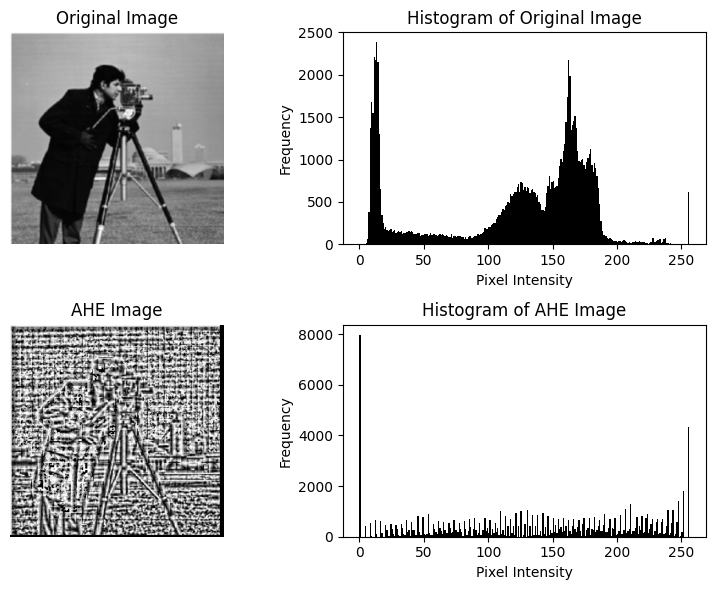

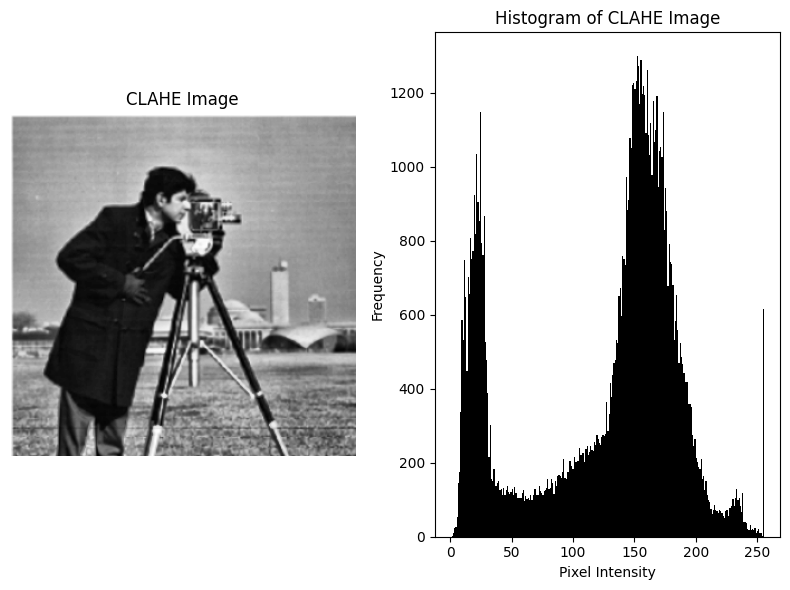

In [61]:

# Step 3: Display the Results
plt.figure(figsize=(8, 6))

plt.subplot(2, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.hist(image.ravel(), bins=256, range=[0, 256], color='black')
plt.title('Histogram of Original Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

plt.subplot(2, 2, 3)
plt.imshow(ahe_image, cmap='gray')
plt.title('AHE Image')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.hist(ahe_image.ravel(), bins=256, range=[0, 256], color='black')
plt.title('Histogram of AHE Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Display CLAHE Image and Histogram
plt.figure(figsize=(8, 6))

plt.subplot(1, 2, 1)
plt.imshow(clahe_image, cmap='gray')
plt.title('CLAHE Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.hist(clahe_image.ravel(), bins=256, range=[0, 256], color='black')
plt.title('Histogram of CLAHE Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


Discussion
- Original Image: The histogram might show limited contrast with concentration in certain intensity ranges.
- AHE Image: The image shows improved local contrast with visible boundaries between tiles.
- CLAHE Image: The image demonstrates enhanced contrast similar to AHE but with more uniform enhancement and reduced noise.


### Task 3: Implementing Histogram Equalization on Color Images

In [63]:
def equalize_channel(channel):
    # Apply histogram equalization to a single channel
    return cv2.equalizeHist(channel)

# Step 1: Load the color image
image = cv2.imread("colored_objects.png")

# Convert from BGR to RGB for correct color representation
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


In [64]:
# Step 2: Split the image into R, G, and B channels
r_channel, g_channel, b_channel = cv2.split(image_rgb)

# Apply histogram equalization to each channel
r_eq = equalize_channel(r_channel)
g_eq = equalize_channel(g_channel)
b_eq = equalize_channel(b_channel)

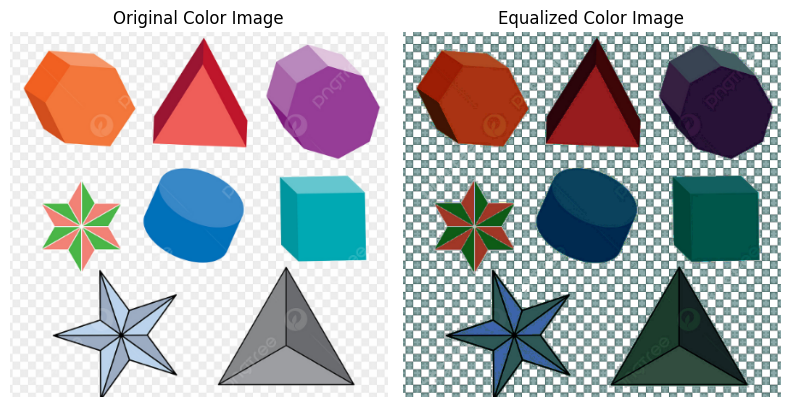

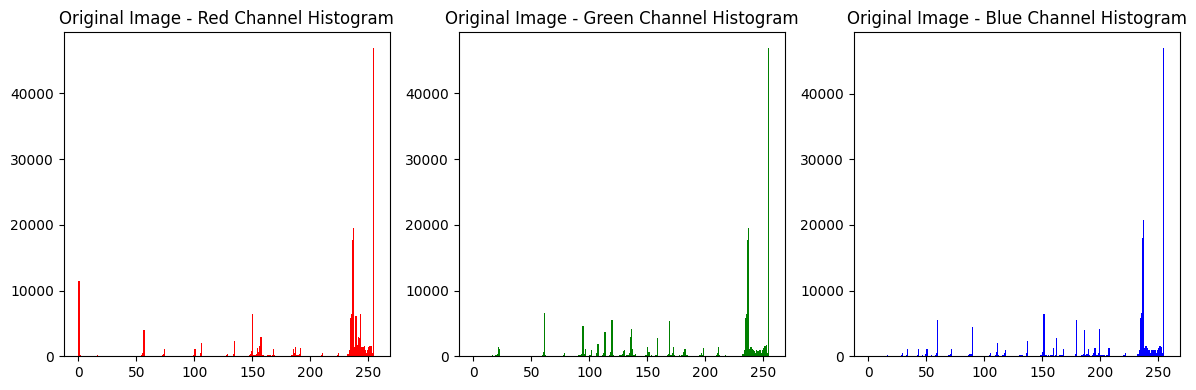

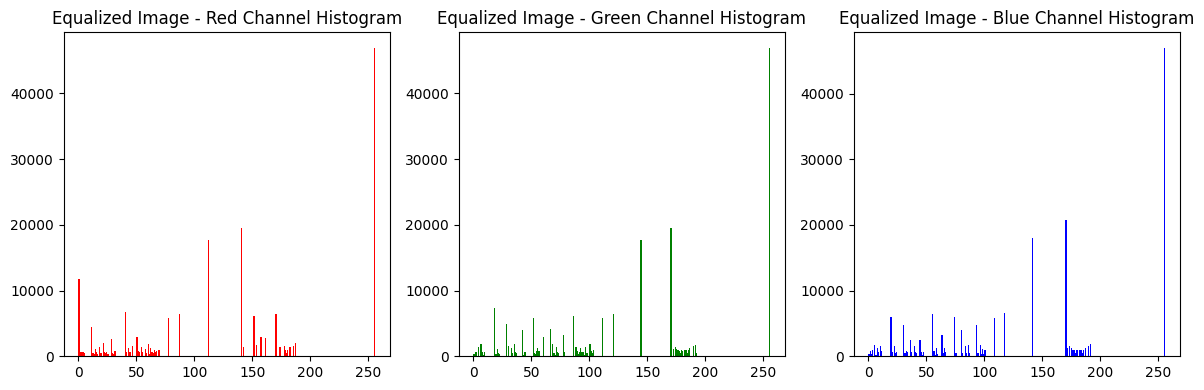

In [67]:
# Step 3: Reconstruct the color image from equalized channels
equalized_image = cv2.merge([r_eq, g_eq, b_eq])

# Display the original and equalized images
plt.figure(figsize=(8, 6))

plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title('Original Color Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(equalized_image)
plt.title('Equalized Color Image')
plt.axis('off')

plt.tight_layout()
plt.show()

# Display histograms of the original and equalized images
def plot_histograms(image, title):
    r, g, b = cv2.split(image)
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 3, 1)
    plt.hist(r.ravel(), bins=256, range=[0, 256], color='red')
    plt.title(f'{title} - Red Channel Histogram')
    plt.subplot(1, 3, 2)
    plt.hist(g.ravel(), bins=256, range=[0, 256], color='green')
    plt.title(f'{title} - Green Channel Histogram')
    plt.subplot(1, 3, 3)
    plt.hist(b.ravel(), bins=256, range=[0, 256], color='blue')
    plt.title(f'{title} - Blue Channel Histogram')
    plt.tight_layout()
    plt.show()

plot_histograms(image_rgb, 'Original Image')
plot_histograms(equalized_image, 'Equalized Image')


Discussion
- Original Color Image: May show some channels with concentrated pixel intensities, leading to limited contrast.
- Equalized Color Image: The histogram equalization enhances contrast in each channel, potentially leading to a more balanced and visually enhanced image. However, this can sometimes result in color artifacts or unnatural color shifts, as equalization does not consider the interplay between channels.


### Task 4: Histogram Equalization in Different Applications

In [69]:
def equalize_hist(image):


    if len(image.shape) != 2:
        raise ValueError("Input image must be grayscale.")

    histogram, bins = np.histogram(image.flatten(), bins=256, range=[0, 256])

    # Compute Cumulative Distribution Function (CDF)
    cdf = np.cumsum(histogram)
    cdf_normalized = cdf * (255 / cdf[-1])  

    equalized_image = np.interp(image.flatten(), bins[:-1], cdf_normalized).reshape(image.shape).astype(np.uint8)

    return equalized_image

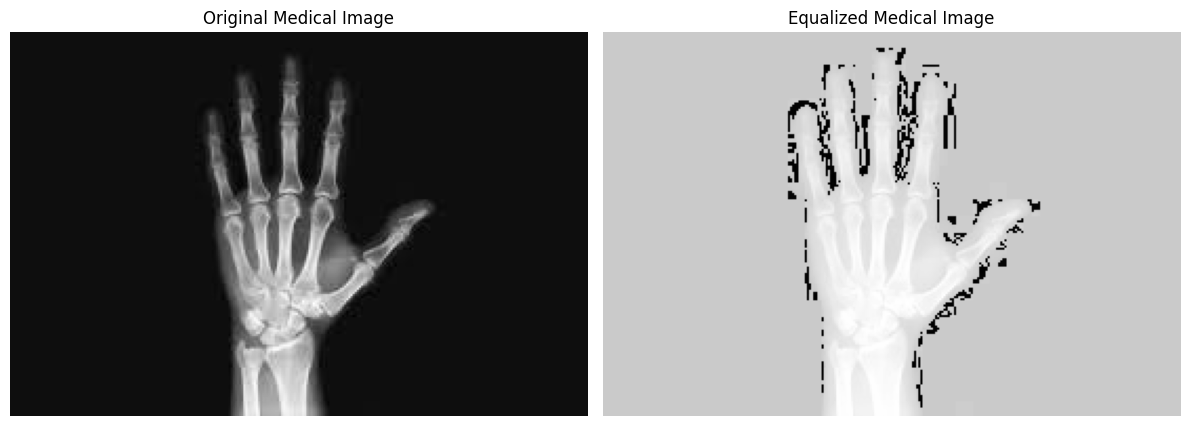

In [70]:
# 1. Medical Imaging

medical_image = cv2.imread("Xray.jpeg", 0)  # Replace with your image file

# Apply histogram equalization
equalized_medical_image = equalize_hist(medical_image)

# Display the results
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(medical_image, cmap='gray')
plt.title('Original Medical Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(equalized_medical_image, cmap='gray')
plt.title('Equalized Medical Image')
plt.axis('off')

plt.tight_layout()
plt.show()


Histogram equalization can enhance the visibility of features such as fractures or lesions by increasing the contrast between different tissues.
It may make subtle details more apparent, aiding in diagnosis and analysis.

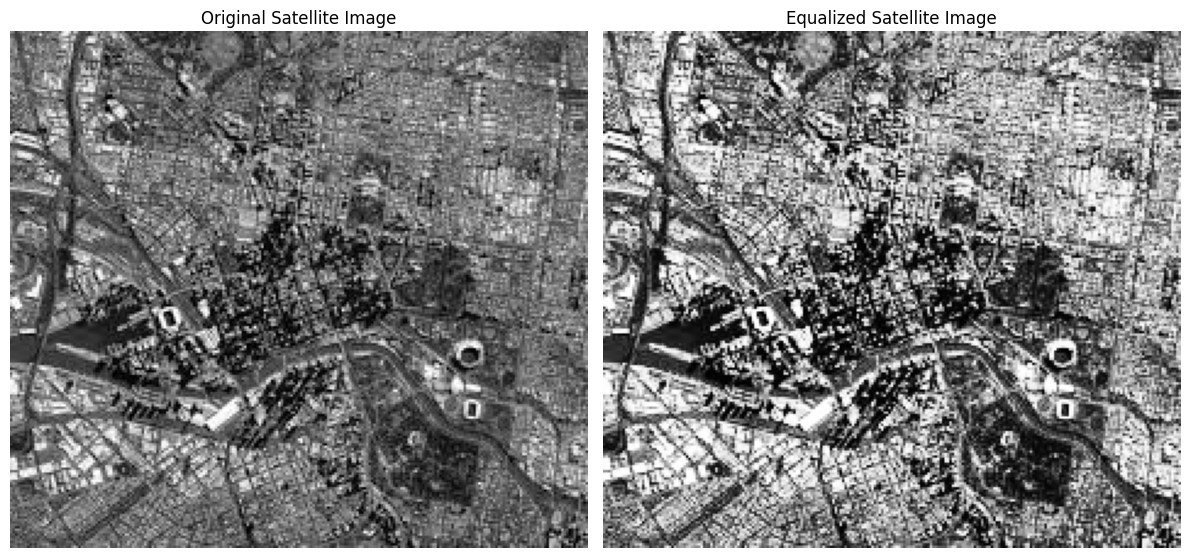

In [71]:
# Load a satellite image
satellite_image = cv2.imread("satellite.jpeg")

satellite_image_gray = cv2.cvtColor(satellite_image, cv2.COLOR_BGR2GRAY)

equalized_satellite_image = equalize_hist(satellite_image_gray)

# Display the results
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(satellite_image_gray, cmap='gray')
plt.title('Original Satellite Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(equalized_satellite_image, cmap='gray')
plt.title('Equalized Satellite Image')
plt.axis('off')

plt.tight_layout()
plt.show()



Histogram equalization can enhance the contrast of terrain features, water bodies, or urban areas in satellite images.
It can improve the visibility of details that might be obscured due to poor contrast.

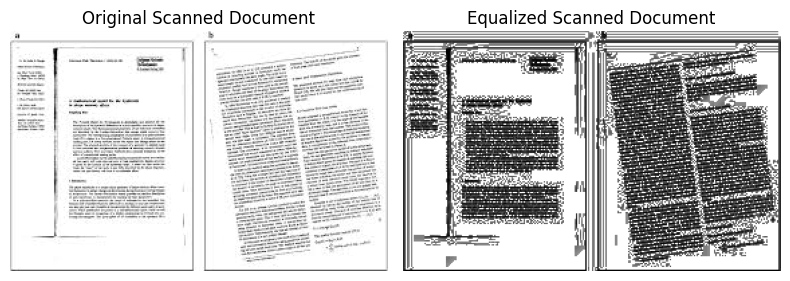

In [72]:
# Load a scanned document
document_image = cv2.imread("document.jpeg", 0)  # Replace with your image file

equalized_document_image = equalize_hist(document_image)

# Display the results
plt.figure(figsize=(8, 6))

plt.subplot(1, 2, 1)
plt.imshow(document_image, cmap='gray')
plt.title('Original Scanned Document')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(equalized_document_image, cmap='gray')
plt.title('Equalized Scanned Document')
plt.axis('off')

plt.tight_layout()
plt.show()


Histogram equalization can make text and other document features stand out more clearly.
It improves readability by enhancing the contrast between text and background.

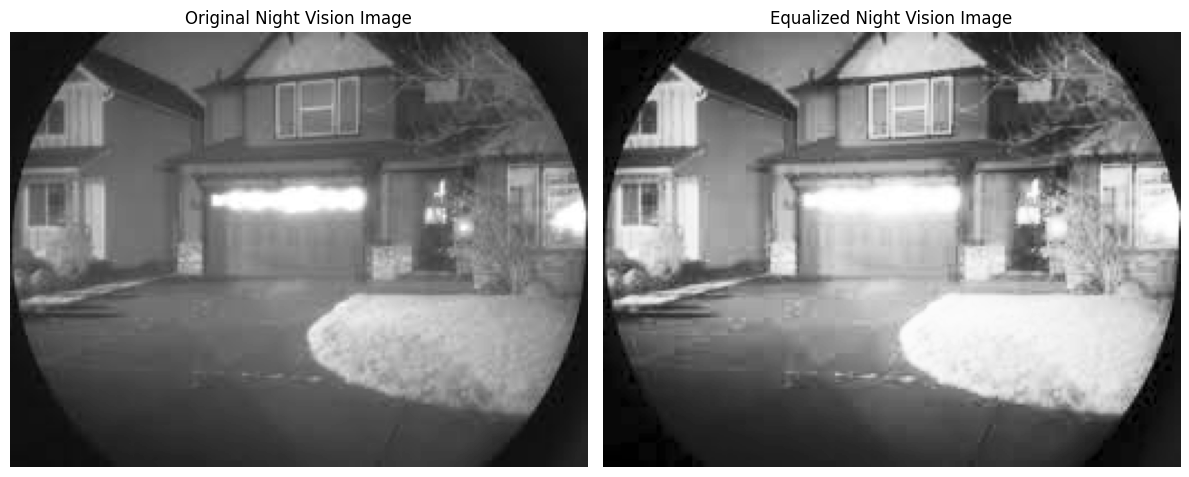

In [73]:
# Load a night vision image
night_vision_image = cv2.imread("nightimage.jpeg", 0)  

equalized_night_vision_image = equalize_hist(night_vision_image)

# Display the results
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(night_vision_image, cmap='gray')
plt.title('Original Night Vision Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(equalized_night_vision_image, cmap='gray')
plt.title('Equalized Night Vision Image')
plt.axis('off')

plt.tight_layout()
plt.show()


Histogram equalization can enhance details in night vision images by improving contrast.
It helps in making objects and features more visible in low-light conditions.

### Task 5: Histogram Equalization for Low Contrast Images

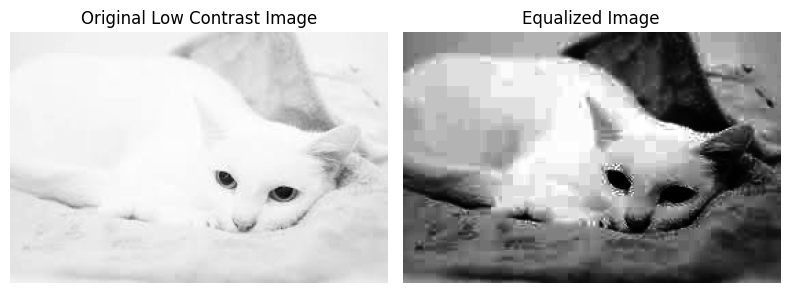

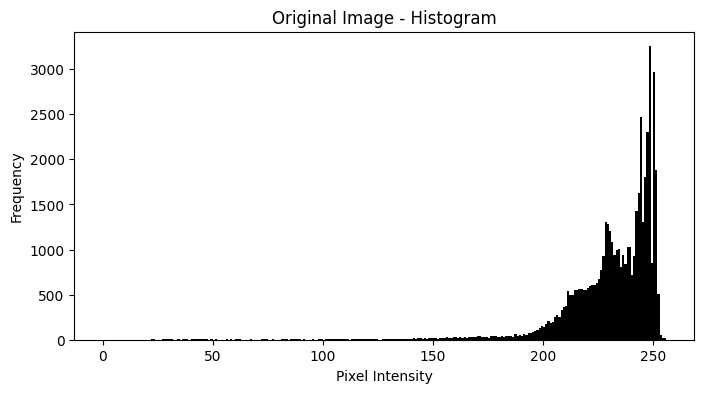

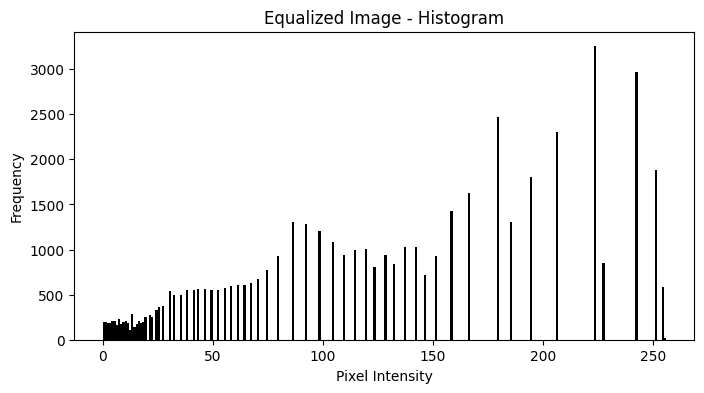

In [77]:
image = cv2.imread("lowcontrast.jpeg", 0)  # Replace with your image file

# Apply histogram equalization
equalized_image = equalize_hist(image)

# Display the results
plt.figure(figsize=(8, 6))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Low Contrast Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(equalized_image, cmap='gray')
plt.title('Equalized Image')
plt.axis('off')

plt.tight_layout()
plt.show()

def plot_histograms(image, title):
    r = image.ravel()
    plt.figure(figsize=(8, 4))
    plt.hist(r, bins=256, range=[0, 256], color='black')
    plt.title(f'{title} - Histogram')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.show()

plot_histograms(image, 'Original Image')
plot_histograms(equalized_image, 'Equalized Image')


Discussion

- Histogram Equalization: This process redistributes the intensity values of the image, stretching the histogram to cover a wider range of intensities. For low contrast images, this means that pixel values that were clustered together are spread out, making differences more noticeable.

- Visual Improvement: By comparing the original and equalized images, you should observe that the equalized image has more defined features and improved contrast. Areas that were previously uniform or flat should now show more detail and variation.

- Application: Histogram equalization is particularly useful for enhancing images with low contrast, making it easier to discern features that might be crucial for tasks such as medical diagnosis, object recognition, and visual inspection.



### Task 6: Multi-Scale Histogram Equalization

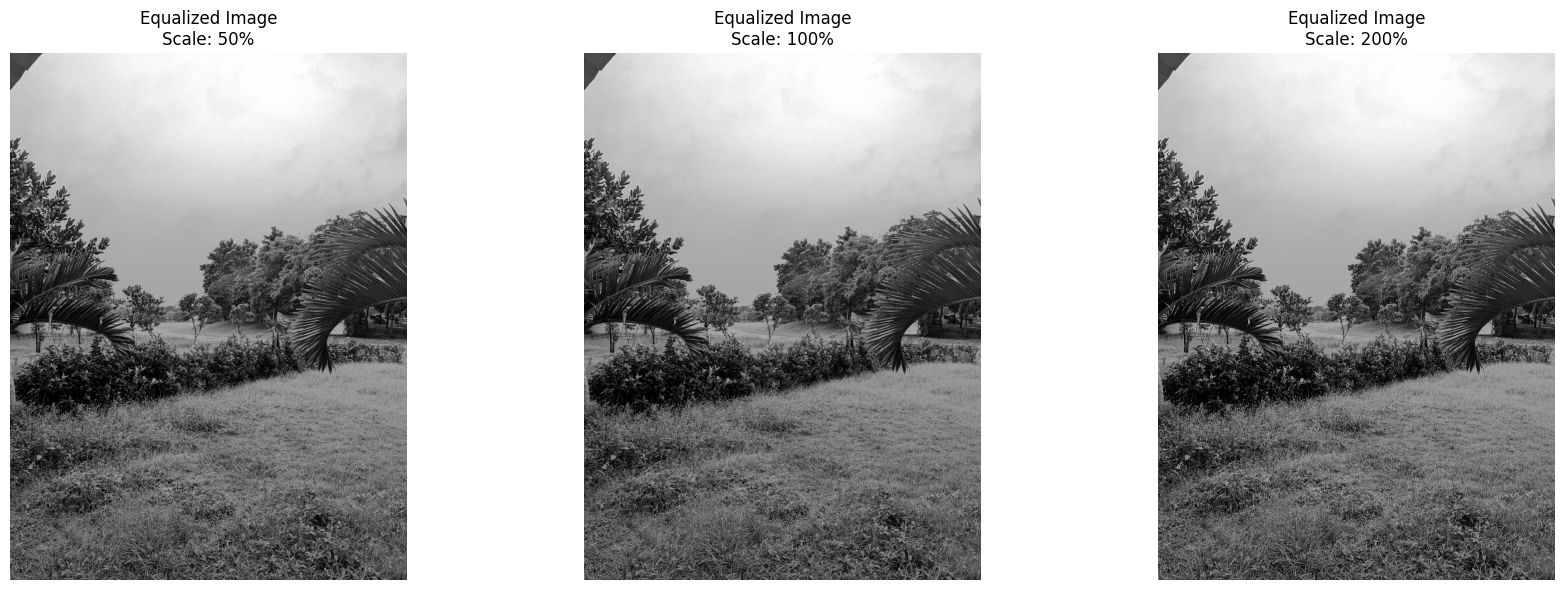

In [78]:
def resize_and_equalize(image, scales):

    equalized_images = []
    for scale in scales:
        width = int(image.shape[1] * scale)
        height = int(image.shape[0] * scale)
        dim = (width, height)
        resized_image = cv2.resize(image, dim, interpolation=cv2.INTER_LINEAR)

        equalized_image = equalize_hist(resized_image)
        equalized_images.append(equalized_image)
    
    return equalized_images

# Load a grayscale image
image = cv2.imread("img_mv.jpg", 0)  # Replace with your image file

# Define scales to test
scales = [0.5, 1.0, 2.0]

# Resize and apply histogram equalization
equalized_images = resize_and_equalize(image, scales)

# Display results
plt.figure(figsize=(18, 6))

for i, scale in enumerate(scales):
    plt.subplot(1, len(scales), i + 1)
    plt.imshow(equalized_images[i], cmap='gray')
    plt.title(f'Equalized Image\nScale: {int(scale * 100)}%')
    plt.axis('off')

plt.tight_layout()
plt.show()


Effect of Scale on Equalization:

50% Scale: Resized image may show less detail, and equalization might be less effective because the image is smaller and contains fewer pixel values.
100% Scale: The original size of the image where histogram equalization will typically produce standard results.
200% Scale: Enlarged image might exhibit more visible artifacts, and the histogram equalization might be less effective due to pixel interpolation artifacts introduced during resizing.

Impact on Features:

The visibility and enhancement of features can vary with scale. Smaller images may lose detail, while larger images might show artifacts that affect the effectiveness of histogram equalization.

Visual Quality:

Compare how features, contrasts, and artifacts change with different scales. Larger images might enhance features differently than smaller ones due to pixel interpolation and scaling effects.


### Task 7: Histogram Equalization for Image Enhancement

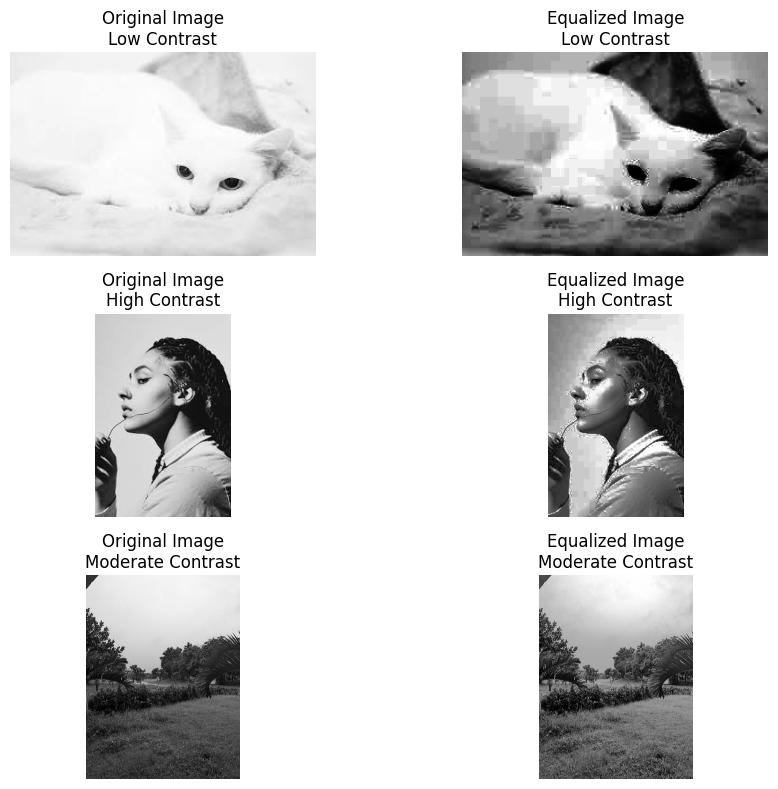

In [81]:
# Load images with varying levels of detail and contrast
images = {
    'Low Contrast': cv2.imread("lowcontrast.jpeg", 0),
    'High Contrast': cv2.imread("highcontrast.jpeg", 0),
    'Moderate Contrast': cv2.imread("img_mv.jpg", 0)
}

# Apply histogram equalization
equalized_images = {key: equalize_hist(img) for key, img in images.items()}

# Display and compare results
plt.figure(figsize=(10, 8))

for i, (title, img) in enumerate(images.items()):
    plt.subplot(3, 2, i * 2 + 1)
    plt.imshow(img, cmap='gray')
    plt.title(f'Original Image\n{title}')
    plt.axis('off')

    plt.subplot(3, 2, i * 2 + 2)
    plt.imshow(equalized_images[title], cmap='gray')
    plt.title(f'Equalized Image\n{title}')
    plt.axis('off')

plt.tight_layout()
plt.show()


How Histogram Equalization Improves Visual Analysis:

- Enhanced Detail Visibility: By spreading out the intensity values, histogram equalization reveals details that were previously hidden due to low contrast.

- Improved Clarity: In high contrast images, it can make features in shadows and highlights more discernible.

- Consistent Quality: In images with moderate contrast, it provides a consistent enhancement across the image, improving overall quality.


### Task 8: Histogram Equalization in Image Segmentation

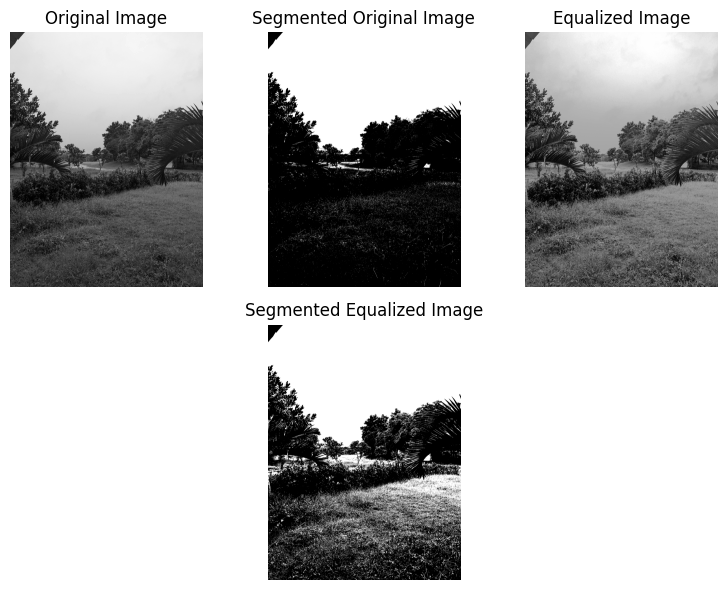

In [84]:
def segment_image(image, method='threshold', threshold_value=128):

    if method == 'threshold':
        _, segmented_image = cv2.threshold(image, threshold_value, 255, cv2.THRESH_BINARY)
    elif method == 'region':
        _, labels, stats, _ = cv2.connectedComponentsWithStats(image, connectivity=8)
        segmented_image = np.zeros_like(image)
        for i in range(1, len(stats)):
            if stats[i, cv2.CC_STAT_AREA] > 100:  # Filter small components
                segmented_image[labels == i] = 255
    else:
        raise ValueError("Unsupported segmentation method. Use 'threshold' or 'region'.")
    
    return segmented_image

image = cv2.imread("img_mv.jpg", 0)

segmented_original = segment_image(image, method='threshold')

equalized_image = equalize_hist(image)

segmented_equalized = segment_image(equalized_image, method='threshold')

# Display results
plt.figure(figsize=(8, 6))

plt.subplot(2, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(segmented_original, cmap='gray')
plt.title('Segmented Original Image')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(equalized_image, cmap='gray')
plt.title('Equalized Image')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(segmented_equalized, cmap='gray')
plt.title('Segmented Equalized Image')
plt.axis('off')

plt.tight_layout()
plt.show()


Impact on Segmentation Accuracy:

- Enhanced Features: 
    - Histogram equalization can make subtle features more visible, potentially improving segmentation results.
- Noise and Artifacts: 
    - Equalization may also amplify noise or artifacts, which can impact segmentation accuracy.

Effectiveness:

- Low Contrast Images: For images with low contrast, equalization can significantly enhance feature visibility and improve segmentation performance.
- High Contrast Images: For already high-contrast images, the impact may be less pronounced, and the risks of artifact introduction should be considered.
